In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

pd.pandas.set_option('Display.max_columns',None)
pd.pandas.set_option('Display.max_rows',None)

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## numerical and Categorical features

In [4]:
# numerical_features
numerical_features = [feature for feature in train.columns if train[feature].dtype in ['int64','float64']
                     and feature not in ['PassengerId']]
numerical_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [5]:
# discreate features
discreate_features = [feature for feature in numerical_features if len(train[feature].unique()) < 25]
discreate_features

['Survived', 'Pclass', 'SibSp', 'Parch']

In [6]:
# continuous feature
continuous_feature = [feature for feature in numerical_features if feature not in discreate_features]
continuous_feature

['Age', 'Fare']

In [7]:
## Categorical features
categorical_features = [feature for feature in train.columns if feature not in numerical_features
                       and feature not in ['PassengerId']]
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

## Nan Features

In [8]:
numerical_nan = [feature for feature in numerical_features if train[feature].isnull().sum() >=1 ]
numerical_nan

['Age']

In [14]:
categorical_nan = [feature for feature in categorical_features if train[feature].isnull().sum() >=1]
categorical_nan

['Cabin', 'Embarked']

<AxesSubplot:>

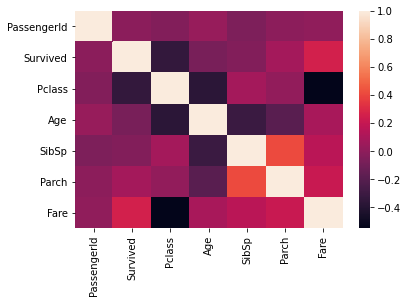

In [13]:
sns.heatmap(train.corr())

## Pipeline

In [18]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer

In [19]:
categorical_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values='most_frequent')),
])

In [20]:
categorical_pipeline.fit(categorical_nan)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Cabin'